## 2.3.5　決定木

In [1]:
import os
import mglearn
import warnings
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (5, 5)

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [4]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print('Accuracy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set:{:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.951


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set:{:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set:0.995
Accuracy on test set:0.951


In [6]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


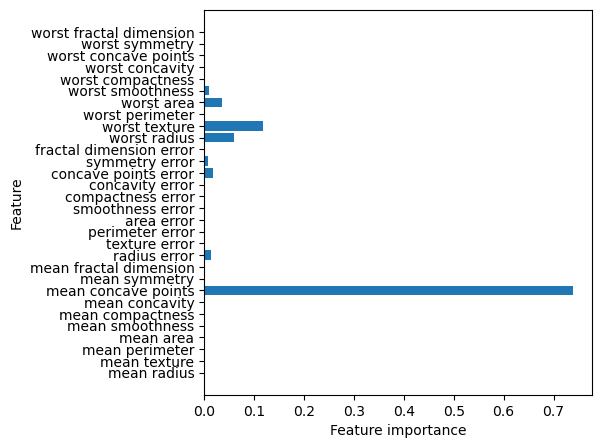

In [7]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer
               .feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances_cancer(tree)

Text(0, 0.5, 'Price in $/Mbyte')

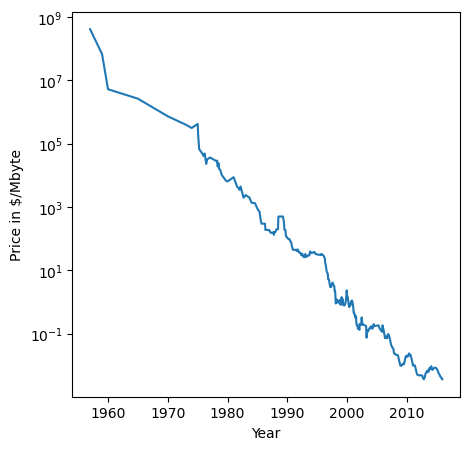

In [8]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [9]:
ram_prices = ram_prices[['date', 'price']]
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [10]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print(data_train.shape)
print(data_test.shape)

(202, 2)
(131, 2)


In [11]:
X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

In [12]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [13]:
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

In [14]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

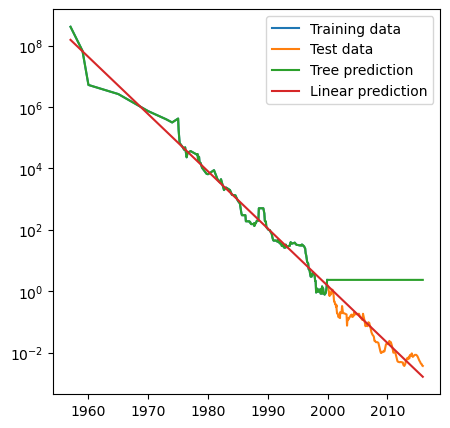

In [15]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()